In [1]:
%matplotlib inline

In [2]:
feature_file_name = "densenet_features.pkl"
history_file_name = "dense-glove-model_run_history.pkl"
best_epoch_filename = "dense-model-ep004-loss3.581-val_loss3.808.h5"

In [3]:

import pickle

from utils.plothist import plot
from utils.helpers import Config 

from utils.eval import prepare_evaluate_params, demo_captions, evaluate_model, predict_img


from keras.models import Model, load_model

c = Config() 

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# history plot

In [4]:
history = pickle.load(open(c.ExtractedFeaturesFilePath(history_file_name), "rb"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


dict_keys(['loss', 'val_loss'])


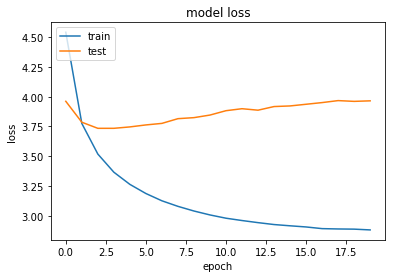

In [5]:
plot(history)

# model evaluation 

In this section we run the following tests: 
- BLEU scoring
- Qualitative test on demo_list
- BYO predictions


In [4]:
model = load_model(best_epoch_filename)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [5]:
# load model and run bleu test, it also returns the tokenizer and max_length to be used later
tokenizer, test_features, test_descriptions, max_length = prepare_evaluate_params(c, model, feature_file_name)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 34)           0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 1024)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 34, 200)      1515800     input_2[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 1024)         0           input_1[0][0]                    
__________________________________________________________________________________________________
dropout_2 

## BLEU Eval

In [6]:
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

BLEU-1: 0.399082
BLEU-2: 0.214153
BLEU-3: 0.143748
BLEU-4: 0.061815


## use the model to make predictions on test images

this step produces sample captions on on select set of test images, this is the AJ test. 

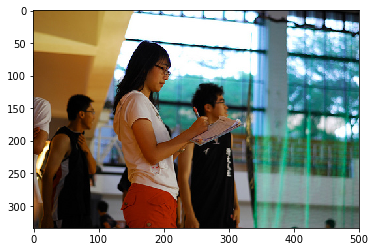

startseq two men are standing in front of the street endseq


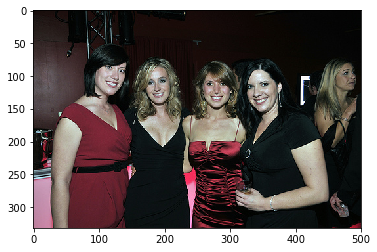

startseq two women in black and white are sitting on the sidewalk endseq


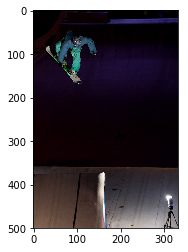

startseq man in red shirt is riding skateboard down the street endseq


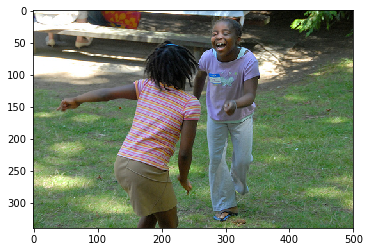

startseq man in blue shirt is standing on the sidewalk endseq


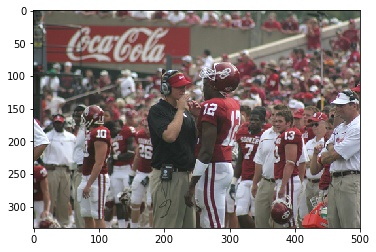

startseq group of people are standing around endseq


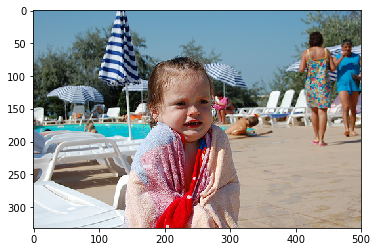

startseq two girls are sitting on the sidewalk endseq


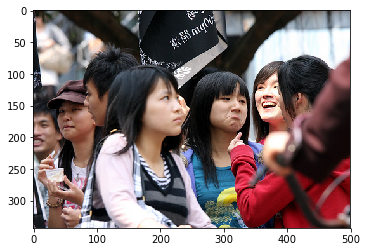

startseq man in black shirt and black shirt is holding her arms endseq


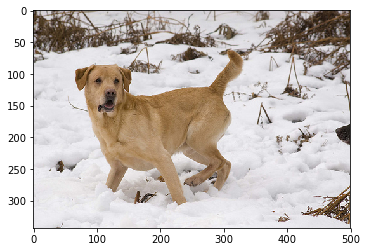

startseq dog is running through the snow endseq


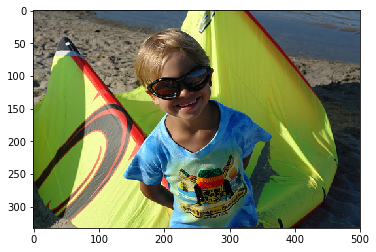

startseq young boy in pink shirt is jumping into the air endseq


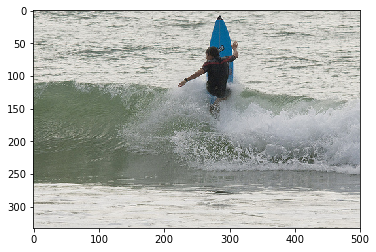

startseq man in kayak is surfing in the water endseq


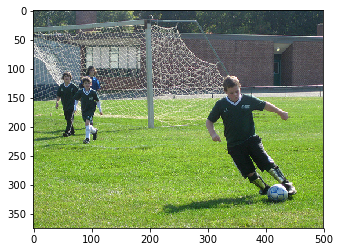

startseq young boy in red shirt is jumping over the air endseq


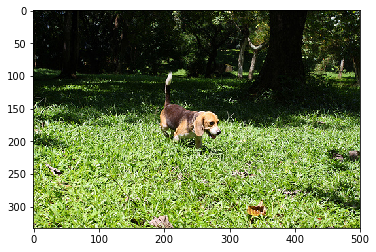

startseq dog is running through the grass endseq


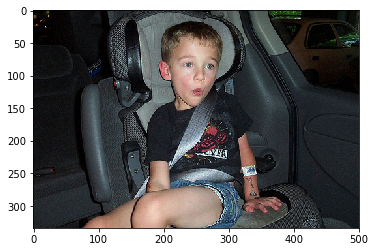

startseq young girl in blue shirt and blue shirt is sitting on couch endseq


In [7]:
demo_captions(c, model, test_features, tokenizer, test_descriptions, max_length)

# Bring your own image

In [8]:
# prepare the photo input 
demo_path = c.flickr_images_directory + "/"
img_filepath = demo_path + "1015118661_980735411b.jpg"
#img_filepath = "user/mutaz/car1.jpg"

In [9]:
import keras.applications.densenet as densenet121

keras_app = densenet121
# load a cnn model to examine the classification
cnn_model = densenet121.DenseNet121()


In [10]:
# load a cnn feature representation model, this one is used for producing input to the captioning model 
cnn_model_features = densenet121.DenseNet121()
cnn_model_features.layers.pop()
cnn_model_features = Model(inputs=cnn_model_features.inputs, outputs=cnn_model_features.layers[-1].output)

jean (43.03%)
[[('n03594734', 'jean', 0.4302554), ('n03535780', 'horizontal_bar', 0.08106718), ('n04507155', 'umbrella', 0.054274276), ('n03763968', 'military_uniform', 0.018118411), ('n02825657', 'bell_cote', 0.017265756)]]
0>> startseq man
1>> startseq man in
2>> startseq man in blue
3>> startseq man in blue shirt
4>> startseq man in blue shirt and
5>> startseq man in blue shirt and black
6>> startseq man in blue shirt and black shirt
7>> startseq man in blue shirt and black shirt is
8>> startseq man in blue shirt and black shirt is standing
9>> startseq man in blue shirt and black shirt is standing on
10>> startseq man in blue shirt and black shirt is standing on the
11>> startseq man in blue shirt and black shirt is standing on the street
12>> startseq man in blue shirt and black shirt is standing on the street endseq


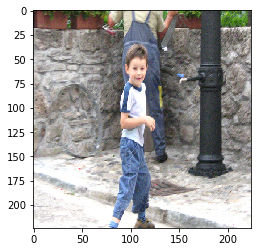

CNN model classification: jean (43.03%)
caption: startseq man in blue shirt and black shirt is standing on the street endseq


In [11]:
predict_img(model, tokenizer, max_length, img_filepath, cnn_model, cnn_model_features, keras_app, target_size = (224,224))


cab (86.36%)
[[('n02930766', 'cab', 0.8635894), ('n04285008', 'sports_car', 0.09757025), ('n02974003', 'car_wheel', 0.012473529), ('n03100240', 'convertible', 0.009541358), ('n04037443', 'racer', 0.0069421865)]]
0>> startseq man
1>> startseq man in
2>> startseq man in black
3>> startseq man in black shirt
4>> startseq man in black shirt and
5>> startseq man in black shirt and black
6>> startseq man in black shirt and black shirt
7>> startseq man in black shirt and black shirt is
8>> startseq man in black shirt and black shirt is standing
9>> startseq man in black shirt and black shirt is standing on
10>> startseq man in black shirt and black shirt is standing on the
11>> startseq man in black shirt and black shirt is standing on the street
12>> startseq man in black shirt and black shirt is standing on the street endseq


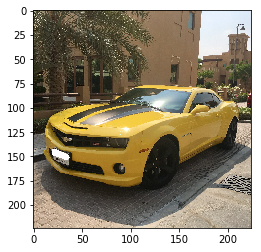

CNN model classification: cab (86.36%)
caption: startseq man in black shirt and black shirt is standing on the street endseq


In [12]:
predict_img(model, tokenizer, max_length, "user/mutaz/car1.jpg", cnn_model, cnn_model_features, keras_app, target_size = (224,224))


jeep (83.99%)
[[('n03594945', 'jeep', 0.83988404), ('n03930630', 'pickup', 0.055296544), ('n03670208', 'limousine', 0.034290653), ('n02814533', 'beach_wagon', 0.028770976), ('n03770679', 'minivan', 0.02196989)]]
0>> startseq man
1>> startseq man in
2>> startseq man in black
3>> startseq man in black shirt
4>> startseq man in black shirt is
5>> startseq man in black shirt is standing
6>> startseq man in black shirt is standing on
7>> startseq man in black shirt is standing on the
8>> startseq man in black shirt is standing on the street
9>> startseq man in black shirt is standing on the street endseq


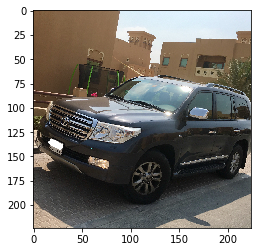

CNN model classification: jeep (83.99%)
caption: startseq man in black shirt is standing on the street endseq


In [13]:
predict_img(model, tokenizer, max_length, "user/mutaz/suv1.jpg", cnn_model, cnn_model_features, keras_app, target_size = (224,224))


mountain_bike (42.85%)
[[('n03792782', 'mountain_bike', 0.42852774), ('n09193705', 'alp', 0.22492695), ('n03127747', 'crash_helmet', 0.0671706), ('n03785016', 'moped', 0.04794738), ('n09468604', 'valley', 0.045067873)]]
0>> startseq man
1>> startseq man in
2>> startseq man in red
3>> startseq man in red shirt
4>> startseq man in red shirt is
5>> startseq man in red shirt is riding
6>> startseq man in red shirt is riding bike
7>> startseq man in red shirt is riding bike on
8>> startseq man in red shirt is riding bike on the
9>> startseq man in red shirt is riding bike on the street
10>> startseq man in red shirt is riding bike on the street endseq


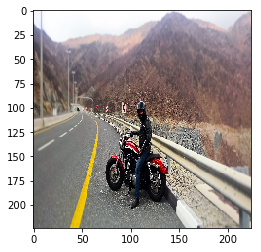

CNN model classification: mountain_bike (42.85%)
caption: startseq man in red shirt is riding bike on the street endseq


In [14]:
predict_img(model, tokenizer, max_length, "user/mutaz/bike1.jpg", cnn_model, cnn_model_features, keras_app, target_size = (224,224))
